<a href="https://colab.research.google.com/github/anandsr724/ml_projects/blob/main/digit_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# show plot without plt.show


from sklearn.metrics import confusion_matrix
import seaborn as sns


# Data

In [ ]:
from keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualising Examples

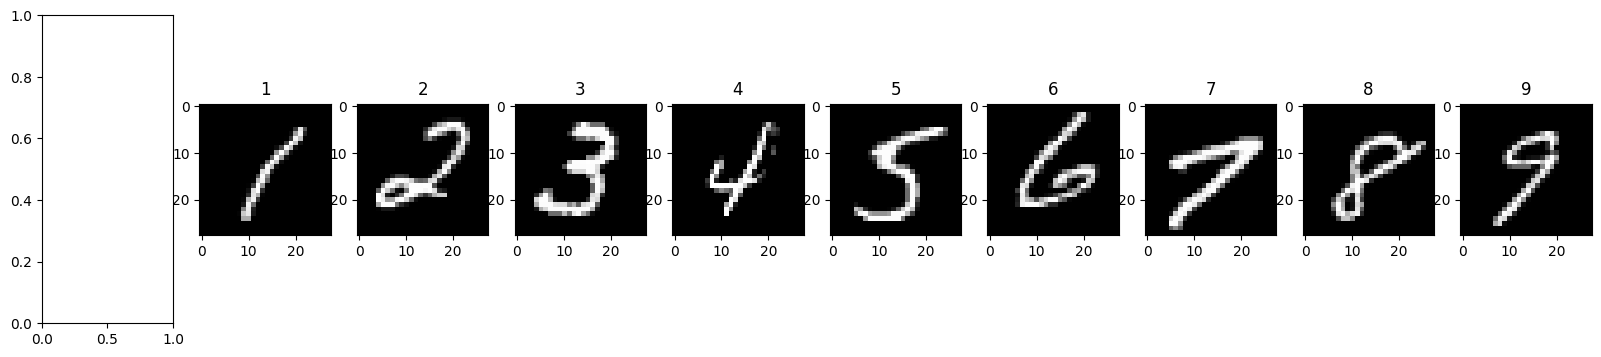

In [ ]:
num_classes =10
fig , ax =  plt.subplots(1,10,figsize=(20,4))

for i in range(1,10):
  sample = x_train[y_train==i][-1]
  ax[i].imshow(sample,cmap="gray")
  ax[i].set_title(i)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# encodeing
import keras
y_train_enc = keras.utils.to_categorical(y_train , num_classes)
y_test_enc  = keras.utils.to_categorical(y_test  , num_classes)

# since we are doing classification

In [ ]:
y_test_enc.shape

(10000, 10)

#Prepare the Data

In [ ]:
# normalization

x_train = x_train /255
x_test = x_test /255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# creating a CNN model

# 3  CNN Layers
# 32 , 64 , 128 filters

model = Sequential()

model.add( Conv2D(16,kernel_size=(3,3),padding ='valid', activation = 'relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add( Conv2D(16,kernel_size=(3,3),padding ='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))


model.add(Flatten())
model.add(Dense(units=128, activation = 'relu'))

# model.add(Dense(units=128,input_shape=(784,), activation = 'relu'))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 batch_normalization_3 (Bat  (None, 11, 11, 16)        64        
 chNormalization)                                                
                                                      

In [ ]:
history = model.fit(x=x_train , y =y_train_enc , epochs=5  , validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 41s 26ms/step - loss: 0.1650 - accuracy: 0.9494 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 2/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0588 - accuracy: 0.9829 - val_loss: 0.0534 - val_accuracy: 0.9835
Epoch 3/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0445 - accuracy: 0.9868 - val_loss: 0.0456 - val_accuracy: 0.9877
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0535 - val_accuracy: 0.9857
Epoch 5/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0491 - val_accuracy: 0.9877
